# US Housing Market Analysis

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Loading and cleaning data
We will be using data from [US Housing Market Analysis: Supply-Demand Dynamics](https://www.kaggle.com/datasets/utkarshx27/factors-influence-house-price-in-us) on Kaggle. There are 2 csv files in this dataset: `supply.csv' and `demand.csv`. 

In [3]:
# Read in data
file_path = Path("data/housing_data.csv")
df = pd.read_csv(file_path)
df.head()

,DATE,CSUSHPINSA,EVACANTUSQ176N,GDP,MORTGAGE30US,MSACSR,MSPUS,PERMIT,TLRESCONS,UMCSENT
0,2002-01-01,116.437,14342,10783.50,6.9975,4.2,188700.0,1665.0,382979,93.0
1,2002-02-01,116.916,14342,10783.50,6.8925,4.0,188700.0,1787.0,391434,90.7
2,2002-03-01,117.929,14342,10783.50,7.0140,4.1,188700.0,1691.0,390942,95.7
3,2002-04-01,119.208,14207,10887.46,6.9850,4.3,187200.0,1669.0,404255,93.0
4,2002-05-01,120.787,14207,10887.46,6.8060,4.0,187200.0,1716.0,399164,96.9


In [5]:
df.tail()

,DATE,CSUSHPINSA,EVACANTUSQ176N,GDP,MORTGAGE30US,MSACSR,MSPUS,PERMIT,TLRESCONS,UMCSENT
248,2022-09-01,300.451,15306,25723.941,6.1120,9.7,468000.0,1588.0,889018,58.6
249,2022-10-01,298.672,14554,26137.992,6.9000,9.7,479500.0,1555.0,874105,59.9
250,2022-11-01,296.809,14554,26137.992,6.8050,9.4,479500.0,1402.0,869322,56.8
251,2022-12-01,294.266,14554,26137.992,6.3640,8.5,479500.0,1409.0,868435,59.7
252,2023-01-01,292.444,15053,26486.287,6.2725,8.1,436800.0,1354.0,851235,64.9


In [7]:
# create a new column called 'PRICE_CHANGE_UP_DOWN' and set the values to 0 if the value of the 'CSUSHPISA' column is less than the value of the previous row, otherwise set the value to 1
df["PRICE_CHANGE_UP_DOWN"] = np.where(df["CSUSHPINSA"] < df["CSUSHPINSA"].shift(1), 0, 1)
df.tail()

,DATE,CSUSHPINSA,EVACANTUSQ176N,GDP,MORTGAGE30US,MSACSR,MSPUS,PERMIT,TLRESCONS,UMCSENT,PRICE_CHANGE_UP_DOWN
248,2022-09-01,300.451,15306,25723.941,6.1120,9.7,468000.0,1588.0,889018,58.6,0
249,2022-10-01,298.672,14554,26137.992,6.9000,9.7,479500.0,1555.0,874105,59.9,0
250,2022-11-01,296.809,14554,26137.992,6.8050,9.4,479500.0,1402.0,869322,56.8,0
251,2022-12-01,294.266,14554,26137.992,6.3640,8.5,479500.0,1409.0,868435,59.7,0
252,2023-01-01,292.444,15053,26486.287,6.2725,8.1,436800.0,1354.0,851235,64.9,0


In [8]:
# get the value counts for the PRICE_CHANGE_UP_DOWN column
df["PRICE_CHANGE_UP_DOWN"].value_counts()

1    174
0     79
Name: PRICE_CHANGE_UP_DOWN, dtype: int64

# Defining the feature and target variables

In [9]:
# Define features set
X = df.copy()
X = X.drop("DATE", axis=1)
X = X.drop("CSUSHPINSA", axis=1)
X = X.drop("PRICE_CHANGE_UP_DOWN", axis=1)
# drop first row
X = X.iloc[1:]
X.head()

,EVACANTUSQ176N,GDP,MORTGAGE30US,MSACSR,MSPUS,PERMIT,TLRESCONS,UMCSENT
1,14342,10783.50,6.8925,4.0,188700.0,1787.0,391434,90.7
2,14342,10783.50,7.0140,4.1,188700.0,1691.0,390942,95.7
3,14207,10887.46,6.9850,4.3,187200.0,1669.0,404255,93.0
4,14207,10887.46,6.8060,4.0,187200.0,1716.0,399164,96.9
5,14207,10887.46,6.6500,4.2,187200.0,1758.0,407305,92.4


In [10]:
# checking the shape of X and if there are any null values
print(X.shape)
print(X.isnull().sum())

(252, 8)
EVACANTUSQ176N    0
GDP               0
MORTGAGE30US      0
MSACSR            0
MSPUS             0
PERMIT            0
TLRESCONS         0
UMCSENT           0
dtype: int64


# Creating the target vector CSUSHPISA = S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)

In [11]:
# Define target vector 'PRICE_CHANGE_UP_DOWN' as y
y = df["PRICE_CHANGE_UP_DOWN"].values.reshape(-1, 1)
y = y[1:]
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

# Splitting the data into training and testing sets

In [12]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [13]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [14]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [15]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled.shape

(63, 8)

# Fitting the Random Forest model

Having scaled the data, we can now fit the Random Forest model to the training data.

In [16]:
# create the random forrest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

# Making predictions with the Random Forest model

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [18]:
# compare predictions to actual values
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


First 10 Predictions:   [1 1 0 0 1 1 1 1 1 0]
First 10 Actual labels: [[1], [1], [0], [0], [1], [1], [1], [1], [1], [0]]


# Evaluating the Random Forest model

In [19]:
# chart of predictions vs actual
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()})
# change the datatypes to float
results_df = results_df.astype("float64")
# add a column for the difference between the prediction and actual
results_df["Difference"] = results_df["Actual"] - results_df["Prediction"]
# add a column for the percent difference between the prediction and actual
results_df["Percent Difference"] = results_df["Difference"] / results_df["Actual"] * 100
# find the highest percent difference
results_df["Percent Difference"].max()
results_df.head(10)

,Prediction,Actual,Difference,Percent Difference
0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,NaN
4,1.0,1.0,0.0,0.0
5,1.0,1.0,0.0,0.0
6,1.0,1.0,0.0,0.0
7,1.0,1.0,0.0,0.0
8,1.0,1.0,0.0,0.0
9,0.0,0.0,0.0,NaN


In [20]:
# calculate the mean absolute error (MAE)
mae = results_df["Difference"].mean()
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: -0.031746031746031744


In [21]:
# calculate the mean squared error (MSE)
mse = results_df["Difference"].apply(lambda x: x**2).mean()
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.031746031746031744


In [22]:
# calculate the root mean squared error (RMSE)
rmse = mse**(0.5)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.1781741612749496


In [23]:
# calculate the mean absolute percent error (MAPE)
mape = results_df["Percent Difference"].abs().mean()
print(f"Mean Absolute Percent Error: {mape}")


Mean Absolute Percent Error: inf


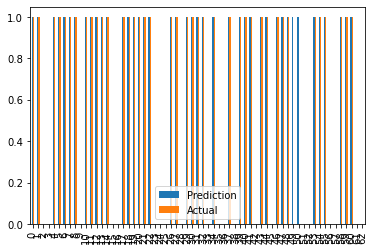

In [24]:
# make a graph of the predictions vs actual with percent difference
results_df.plot(y=["Prediction", "Actual"], kind="bar")
# save the graph
plt.savefig("images/predictions_vs_actual.png")
plt.show()


In [25]:
# Evaluating the Random Forest model
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")


Accuracy Score : 0.9682539682539683


# Feature importance

In [26]:
# get the feature importance array
importances = rf_model.feature_importances_
# list of features
feature_list = list(X.columns)
# sort the features by their importance
sorted(zip(rf_model.feature_importances_, feature_list), reverse=True)
# print the feature importance
for feature in zip(feature_list, rf_model.feature_importances_):
    print(f"{feature[0]}: ({feature[1]})")
    

EVACANTUSQ176N: (0.13434131937637064)
GDP: (0.09924028635253082)
MORTGAGE30US: (0.10564808177392525)
MSACSR: (0.23369804672768896)
MSPUS: (0.08151323102707182)
PERMIT: (0.12920170874636255)
TLRESCONS: (0.10814472498541453)
UMCSENT: (0.10821260101063536)


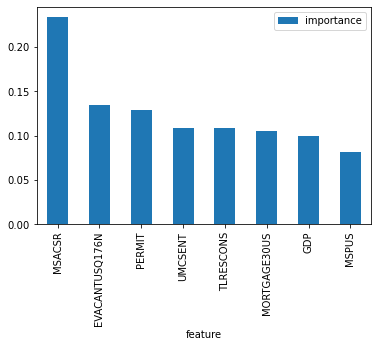

In [27]:
# add the feature importance to a dataframe
feature_importance_df = pd.DataFrame({"feature": feature_list, "importance": importances})
# sort the dataframe by the importance
feature_importance_df = feature_importance_df.sort_values("importance", ascending=False)
# set the index to be the feature
feature_importance_df = feature_importance_df.set_index("feature", drop=True)
# plot the feature importance
feature_importance_df.plot(kind="bar")
# save the graph
plt.savefig("images/feature_importance2.png")
plt.show()

In [28]:
# create a confusion matrix
cm = confusion_matrix(y_test, predictions)
# create a dataframe from the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# display the confusion matrix
display(cm_df)


,Predicted 0,Predicted 1
Actual 0,21,2
Actual 1,0,40
